<a href="https://colab.research.google.com/github/Zerowl7/tensorflow/blob/main/Change_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Импортируем библиотеки

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Загружаем и подготавливаем изображения

In [ ]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [ ]:
content_image = load_image('1_alex.jpg')
style_image = load_image('Astroworld.jpg')

# 2. Визуализация

In [ ]:
content_image.shape

TensorShape([1, 1350, 1080, 3])

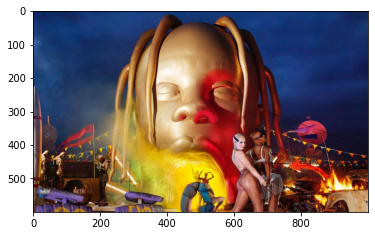

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

# 3. Стилизованное изображение

In [ ]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

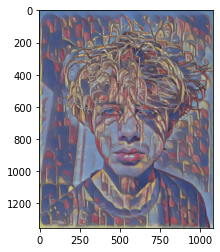

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
cv2.imwrite('new_3_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True